# Notebook — Spambase: Détection de spam


Le dataset Spambase contient 4601 e-mails étiquetés spam ou non-spam, avec 58 attributs décrivant la fréquence de mots, de caractères et l’usage des majuscules. 

Créé par HP Labs, il sert à entraîner et évaluer des modèles de détection de spam. Il illustre la diversité du spam et les difficultés liées aux faux positifs dans la classification.

### Plan :
1- Chargement et visualisation du dataset

2- Prétraitement des données

3- Entrainement des données

4- Evaluation et comparaison

5- Conclusions

### Imports

In [1]:
import sys
import os

# Ajouter la racine du projet à PYTHONPATH
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

print("Chemin ajouté :", project_path)


Chemin ajouté : /Users/aliiii/Desktop/projects/ml-project-ue-a


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) ## pour ignorer les warnings de RuntimeWarning


from src.ml_workflow import * 


### 1- Chargement et visualisation du dataset

In [3]:
import os

spam_path = os.path.join("..", "data", "spambase", "spambase.data")
df = load_data(spam_path)

df.shape, df.head()


Dataset Spambase chargé : 4601 lignes, 58 colonnes
Aperçu des données :
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \

((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0            0.00               0.64           0.64           0.0   
 1            0.21               0.28           0.50           0.0   
 2            0.06               0.00           0.71           0.0   
 3            0.00               0.00           0.00           0.0   
 4            0.00               0.00           0.00           0.0   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0           0.32            0.00              0.00                0.00   
 1           0.14            0.28              0.21                0.07   
 2           1.23            0.19              0.19                0.12   
 3           0.63            0.00              0.31                0.63   
 4           0.63            0.00              0.31                0.63   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0             0.00            0.00  ...   

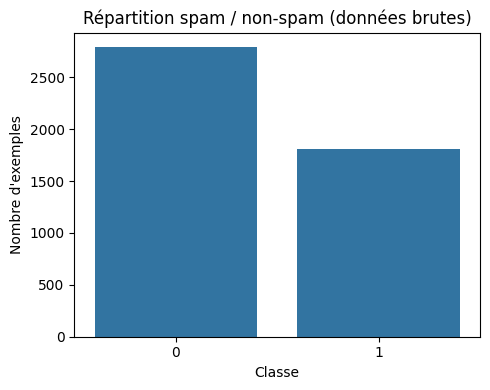

spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64

In [4]:
y_raw = df["spam"]
plot_class_distribution(y_raw, title="Répartition spam / non-spam (données brutes)")
y_raw.value_counts(normalize=True)


In [5]:
# Prétraitement : normalisation + gestion valeurs manquantes
df_clean, pca_model = preprocess_data(df, target_column="spam")


df_clean.shape, df_clean.head()


((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0       -0.342434           0.330885       0.712859       -0.0469   
 1        0.345359           0.051909       0.435130       -0.0469   
 2       -0.145921          -0.165072       0.851723       -0.0469   
 3       -0.342434          -0.165072      -0.556761       -0.0469   
 4       -0.342434          -0.165072      -0.556761       -0.0469   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0       0.011565       -0.350266         -0.291794           -0.262562   
 1      -0.256117        0.672399          0.244743           -0.088010   
 2       1.364846        0.343685          0.193644            0.036670   
 3       0.472573       -0.350266          0.500237            1.308402   
 4       0.472573       -0.350266          0.500237            1.308402   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0        -0.323302       -0.371364  ...   

In [6]:
# afficher Le nombre de lignes et de colonnes, le nom et le type de chaque colonne et le nombre de valeurs non nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
# afficher des statistiques descriptives sur les colonnes
df.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Commentaires:
- Le dataset 4601 données d'entrées et 58 attributs dont 57 featues et une classe label. 
- On n'a pas de données manquantes. En effet, on a 0 valeur nulle pour toutes les colonnes du dataset.
- Comme le dataset est équilibré (39,4% de spam), les métriques comme la F1-score et la courbe PR (Precision-Recall) sont particulièrement pertinentes pour évaluer les performances des modèles.

In [8]:
# On affiche la matrice de corrélation 
corr = df.drop(columns=['spam']).corr(method='pearson')
print("La taille de la matrice de corrélation est ",corr.shape)  # Pour vérifier la taille
print("Matrice de corrélation")
display(corr)

La taille de la matrice de corrélation est  (57, 57)
Matrice de corrélation


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.031693,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.031408,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.021224,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.026017,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,-0.016842,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273


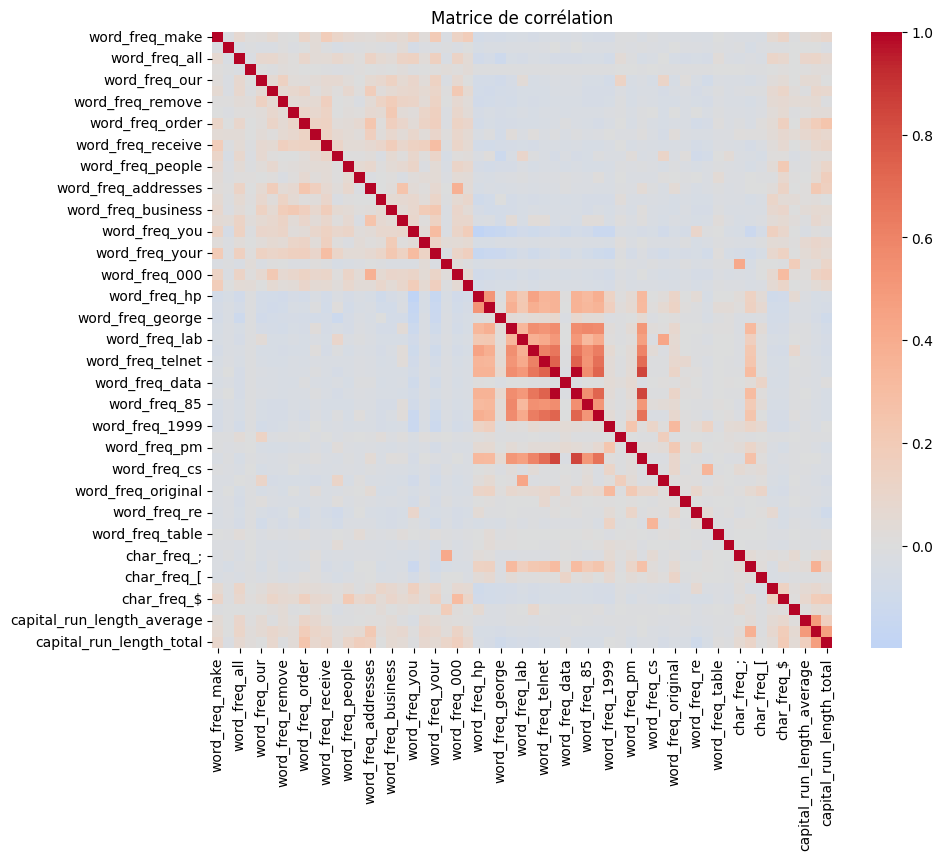

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm',center=0)
plt.title("Matrice de corrélation")
plt.show()

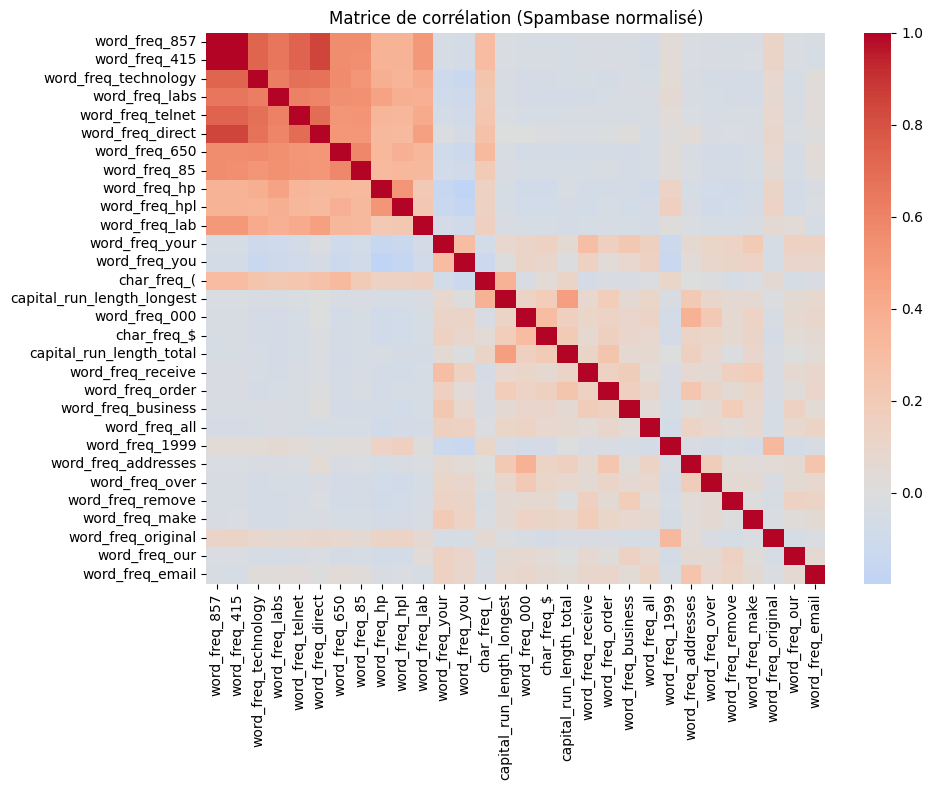

In [10]:
plot_correlation_heatmap(
    df_clean,
    target_column="spam",
    max_features=30,
    title="Matrice de corrélation (Spambase normalisé)"
)


Index(['word_freq_857', 'word_freq_415', 'word_freq_technology',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_direct',
       'word_freq_650', 'word_freq_85', 'word_freq_hp', 'word_freq_hpl'],
      dtype='object')


<Axes: >

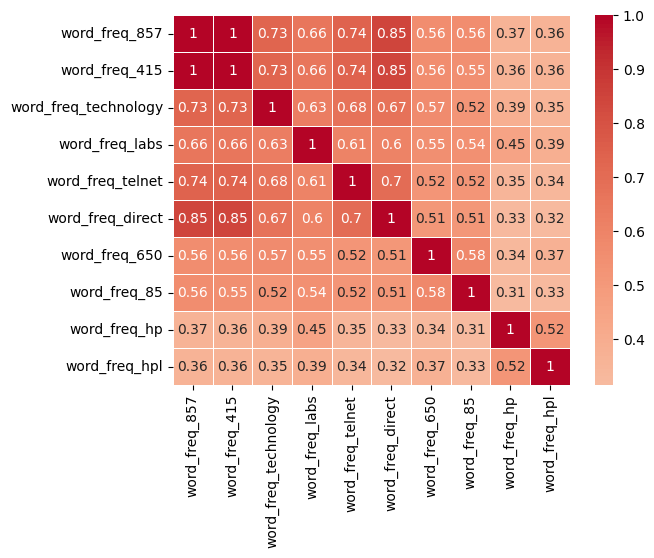

In [11]:
# On visualise ensuite la matrice de corrélation entre les 10 features les plus corrélés
top_features = corr.abs().mean().sort_values(ascending=False).head(10).index
print(top_features)
sns.heatmap(corr.loc[top_features, top_features], annot=True, cmap='coolwarm', center=0,linewidths=0.5)


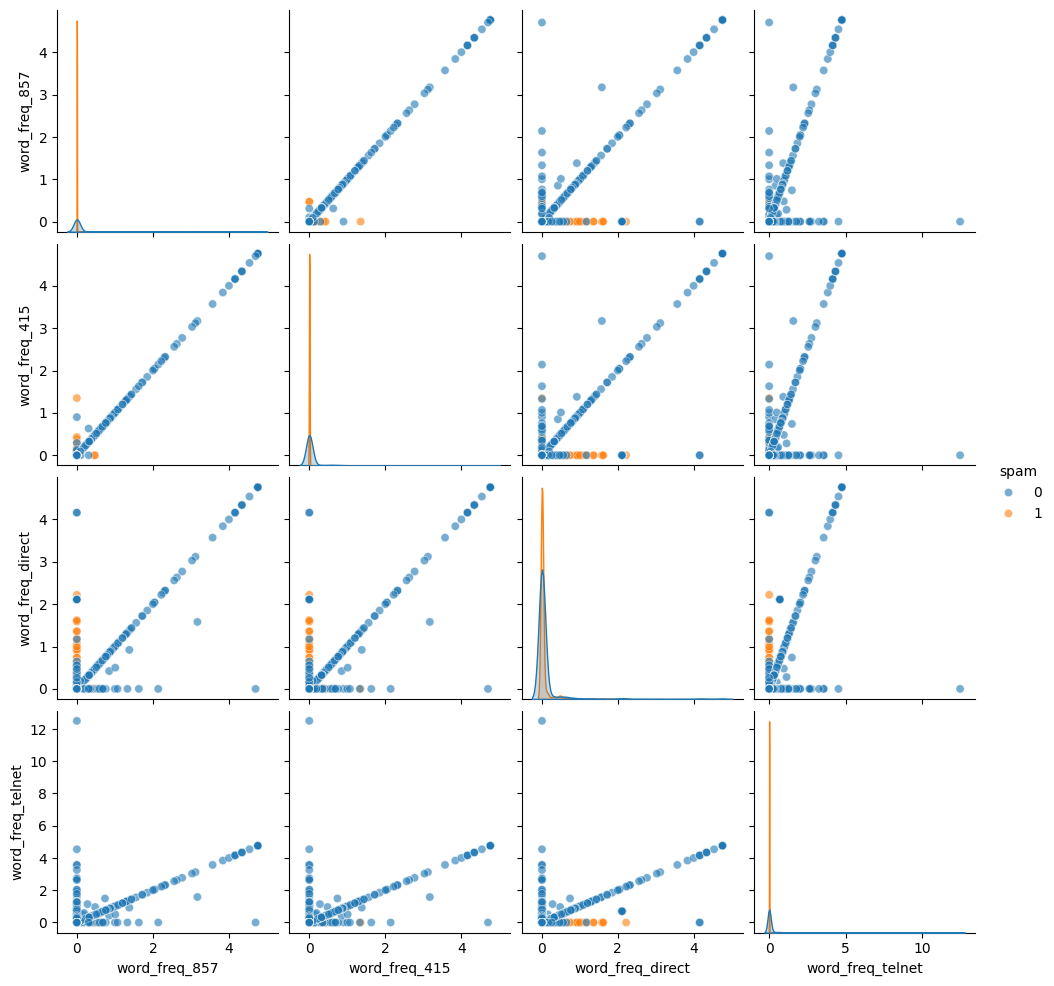

In [12]:
# visualiser les relations entre plusieurs variables
sns.pairplot(
    df[['word_freq_857', 'word_freq_415', 'word_freq_direct', 'word_freq_telnet', 'spam']],
    hue='spam',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)


### Commentaires:
- Le coefficient de corrélation varie de -1 à 1. Si la valeur est proche de 1, cela signifie qu’il existe
une forte corrélation positive entre les deux variables. Lorsqu’il est proche de -1, les variables
ont une forte corrélation négative.
- La matrice de corrélation montre que plusieurs variables présentent des corrélations positives très élevées, notamment word_freq_857, word_freq_415 et word_freq_direct, avec des coefficients dépassant 0.80, ceci est confirmé par les courbes ci-dessus qui montrent des dépendances quasi linéaires entre les variables

## 1er cas: sans PCA

### Prétraitement des données


In [13]:
X_train, X_test, y_train, y_test = split_data(
    df_clean,
    target_column="spam"
)

X_train.shape, X_test.shape

Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


((3680, 57), (921, 57))

### Entrainement des modèles

In [14]:


models, results = train_models(X_train, X_test, y_train, y_test)


pd.DataFrame(results).T




Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.945 | F1: 0.928

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.906 | F1: 0.876

Entraînement du modèle : NeuralNet
NeuralNet entraîné — Accuracy: 0.929 | F1: 0.910

Résumé des performances :
RandomForest → Accuracy: 0.945 | F1: 0.928
KNN          → Accuracy: 0.906 | F1: 0.876
NeuralNet    → Accuracy: 0.929 | F1: 0.910


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy,f1_score
RandomForest,0.944625,0.928471
KNN,0.905537,0.875536
NeuralNet,0.929425,0.909597


### Evaluation des modèles

In [15]:

evaluations = evaluate_models(models, X_test, y_test)



🔍 Évaluation du modèle : RandomForest
Matrice de confusion :
[[539  19]
 [ 32 331]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       558
           1       0.95      0.91      0.93       363

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921


🔍 Évaluation du modèle : KNN
Matrice de confusion :
[[528  30]
 [ 57 306]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       558
           1       0.91      0.84      0.88       363

    accuracy                           0.91       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.91      0.91      0.90       921


🔍 Évaluation du modèle : NeuralNet
Matrice de confusion :
[[529  29]
 [ 36 327]]

Rapport de classification :
              pr

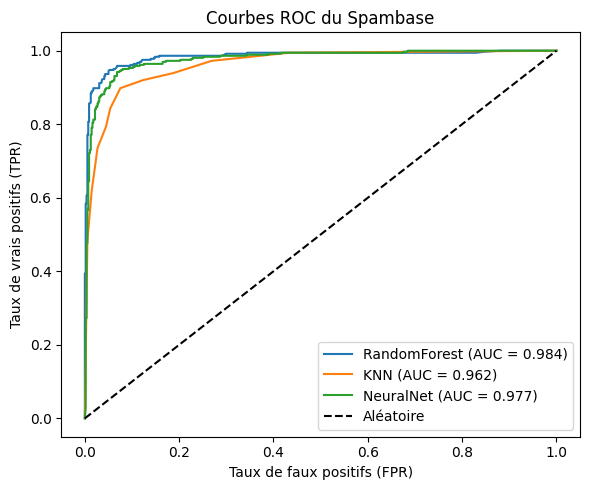

In [16]:
plot_roc_curves(
    models,
    X_test,
    y_test,
    title="Courbes ROC du Spambase"
)


#### Commentaires:

### - Les trois modèles ont un AUC élevé (proche de 1), ce qui montre une excellente capacité à distinguer spam / non-spam.


### -Le meilleur modèle est celui dont la courbe est la plus proche du coin supérieur gauche (TPR élevé, FPR faible).


### - Un bon compromis est nécessaire : augmenter les vrais positifs augmente souvent les faux positifs, d’où l’importance du choix du seuil.



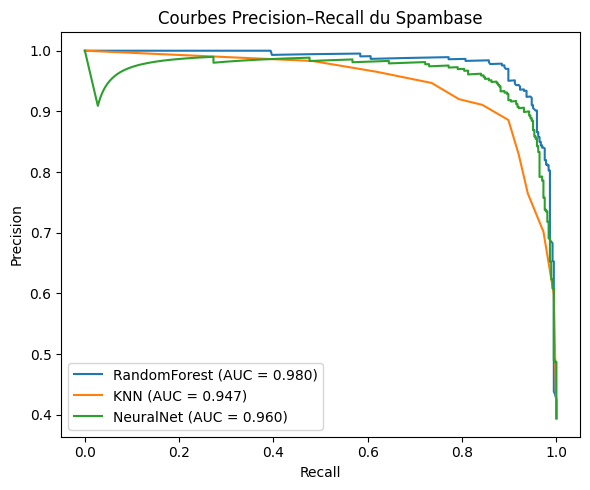

In [17]:
plot_precision_recall_curves(
    models,
    X_test,
    y_test,
    title="Courbes Precision–Recall du Spambase"
)


### Commentaire : On observe que RandomForest obtient la meilleure courbe, avec un AUC = 0.98, ce qui montre une excellente capacité à détecter les spams tout en gardant une précision élevée. 
#### -> La valeur de l'AUC est calculée sur tous les seuils de classification possibles, ce qui donne une évaluation plus robuste que des métriques basées sur un seuil unique comme la précision simple . 
#### -> Le NeuralNet suit avec un AUC = 0.96, montrant un comportement très proche mais légèrement moins stable en fin de courbe. 
#### -> Le KNN, avec un AUC = 0.95, reste performant mais affiche une baisse plus marquée de la précision lorsque le recall augmente, indiquant qu’il génère davantage de faux positifs dans les "zones difficiles" .

### En résumé : RandomForest est nettement le plus robuste, NeuralNet est compétitif, tandis que KNN montre des limites lorsque le seuil devient exigeant.


# ---------  Remarque importante : 


### Dans un contexte de spam :

#### --- Les faux positifs sont coûteux. Donc, il vaut mieux choisir un seuil avant la chute finale de la courbe pour maintenir la précision élevée.

#### --- Le modèle RandomForest semble le plus robuste et sûr pour ce compromis.


Top 15 variables les plus importantes :
                   Feature  Importance
               char_freq_!    0.115733
               char_freq_$    0.095622
          word_freq_remove    0.065479
capital_run_length_average    0.063104
capital_run_length_longest    0.061764
            word_freq_free    0.060216
            word_freq_your    0.056277
              word_freq_hp    0.055966
  capital_run_length_total    0.054438
             word_freq_our    0.029036
             word_freq_you    0.028660
           word_freq_money    0.027534
          word_freq_george    0.027429
             word_freq_hpl    0.022874
             word_freq_edu    0.021391


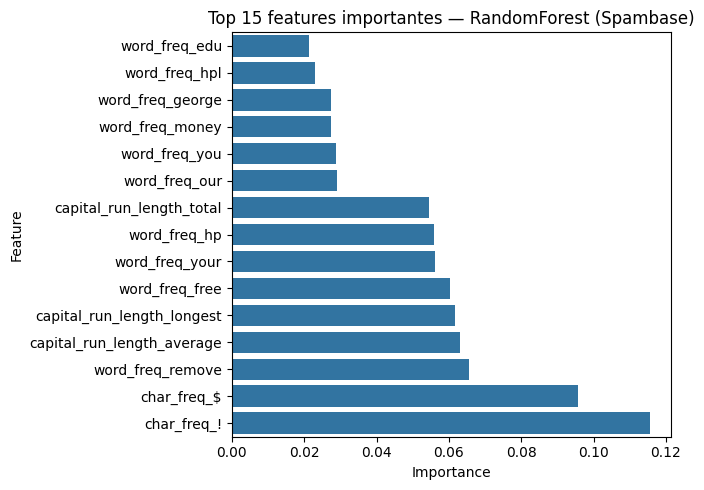

,Feature,Importance
0,char_freq_!,0.115733
1,char_freq_$,0.095622
2,word_freq_remove,0.065479
3,capital_run_length_average,0.063104
4,capital_run_length_longest,0.061764
5,word_freq_free,0.060216
6,word_freq_your,0.056277
7,word_freq_hp,0.055966
8,capital_run_length_total,0.054438
9,word_freq_our,0.029036


In [18]:
rf_model = models["RandomForest"]

top_features = select_features(
    rf_model,
    X_train,
    top_n=15
)

plot_feature_importances_bar(
    top_features,
    title="Top 15 features importantes — RandomForest (Spambase)"
)

top_features


## 2ème cas: avec PCA

### Prétraitement des données


In [19]:
df_clean , _ = preprocess_data(df)


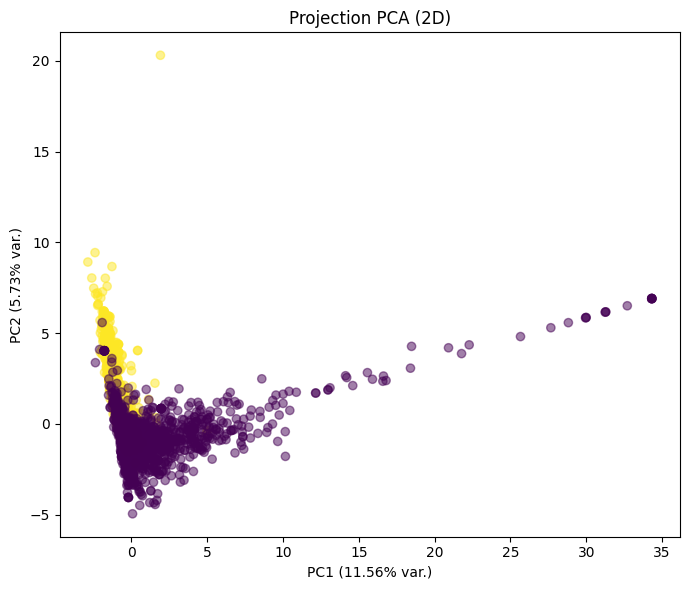

In [20]:
X_pca_input = df_clean.drop(columns=["spam"])
y_pca_input = df_clean["spam"]

plot_pca_2d(X_pca_input,y_pca_input)


## Commentaire : 

#### - Bien que les deux classes (non-spam en violet foncé et spam en jaune) montrent une légère tendance à se séparer, elles présentent un chevauchement important ...

#### - Avec seulement PC1 et PC2, on utilise qu'environ 17.29 %  de la variance totale (11.56 %  + 5.73 %). Le chevauchement est le résultat direct de cette perte d'information significative.

## Conclusion : 
#### La PCA sur 2 dimensions est insuffisante pour bien séparer linéairement les classes "spam" et "non-spam" dans ce dataset. Cela dit , on va essayer de visualiser la variance expliquée par chaque composante principale : 

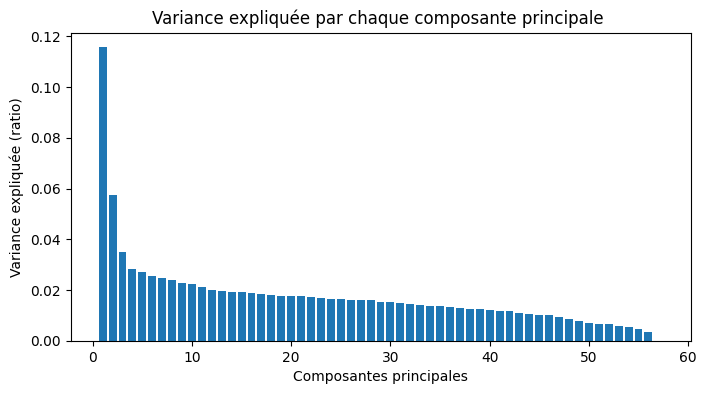

Variance cumulative : 0.9527101489160974 


In [21]:


features = df_clean.drop(columns=["spam"])
pca_full = PCA()
pca_full.fit(features)
n_components = features.shape[1]


plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), pca_full.explained_variance_ratio_)
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée (ratio)")
plt.title("Variance expliquée par chaque composante principale ")
plt.show()



cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(f"Variance cumulative : {cumulative_variance[47]} ")


### Commentaire :   

#### On voit que la variance expliquée chute très rapidement. La première composante principale (CP1) capture la majeure partie de la variance (près de 12 %).Seules les quelques premières composantes (environ les 5 premières) contribuent de manière significative...

### Conclusion : 

#### Malgré la chute initiale, l'information du jeu de données n'est pas fortement concentrée sur un très petit nombre de composantes. Une réduction de dimensionnalité agressive (comme retenir seulement 2 ou 3 CPs) pourrait entraîner une perte d'information significative. (Dans le TP de PCA , on pouvait garder à peu près les deux premières qui contenaient la majeure partie de l'information mais ce n'est pas le cas ici)

#### Plus globalement, fixons la variance à 90% ou 95% et trouvons le nb optimal de dimensions : 

In [22]:


pca_90 = PCA(0.90)
X_reduced90 = pca_90.fit_transform(features)

print(f"Nombre de composantes retenues pour 90% de variance : {pca_90.n_components_}")
print(f"Nombre de features concervées  : {X_reduced90.shape[1]}")


## Si l'on veut concerver 95% de la variance 

pca_95 = PCA(0.95)
X_reduced95 = pca_95.fit_transform(features)

print(f" Nombre de composantes retenues pour 95% de variance : {pca_95.n_components_}")
print(f"Nombre de features concervées : {X_reduced95.shape[1]}")

Nombre de composantes retenues pour 90% de variance : 43
Nombre de features concervées  : 43
 Nombre de composantes retenues pour 95% de variance : 48
Nombre de features concervées : 48


## Commentaire IMPORTANT :
#### - Pour garder entre 90% et 95% de la variance, il faut utiliser entre 43 et 48 composantes ce qui n'est pas un gain très important en dimension...
#### - Cette réduction de dimensionnalité, qui passe de $57$ features originales à environ 45 CPs, ne représente pas un gain significatif en termes de compressibilité ou d'allègement computationnel pour la suite du traitement . Il s'avère donc que l'utilisation de la PCA n'est pas très signifiante. 

In [23]:
df_processed, pca_model = preprocess_data(
    df,
    target_column="spam",
    apply_pca=True,
    pca_variance=0.95
)

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_processed, target_column="spam")


Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


### Entrainement des modèles avec PCA 

In [25]:
models, results = train_models(X_train, X_test, y_train, y_test)



Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.922 | F1: 0.899

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.904 | F1: 0.874

Entraînement du modèle : NeuralNet
NeuralNet entraîné — Accuracy: 0.939 | F1: 0.923

Résumé des performances :
RandomForest → Accuracy: 0.922 | F1: 0.899
KNN          → Accuracy: 0.904 | F1: 0.874
NeuralNet    → Accuracy: 0.939 | F1: 0.923


### Evaluation des modèles avec PCA 

In [26]:
evaluate_models(models, X_test, y_test)



🔍 Évaluation du modèle : RandomForest
Matrice de confusion :
[[527  31]
 [ 41 322]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       558
           1       0.91      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921


🔍 Évaluation du modèle : KNN
Matrice de confusion :
[[528  30]
 [ 58 305]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       558
           1       0.91      0.84      0.87       363

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921


🔍 Évaluation du modèle : NeuralNet
Matrice de confusion :
[[530  28]
 [ 28 335]]

Rapport de classification :
              pr

{'RandomForest': {'classification_report': {'0': {'precision': 0.9278169014084507,
    'recall': 0.9444444444444444,
    'f1-score': 0.9360568383658969,
    'support': 558.0},
   '1': {'precision': 0.9121813031161473,
    'recall': 0.8870523415977961,
    'f1-score': 0.8994413407821229,
    'support': 363.0},
   'accuracy': 0.9218241042345277,
   'macro avg': {'precision': 0.9199991022622991,
    'recall': 0.9157483930211203,
    'f1-score': 0.9177490895740099,
    'support': 921.0},
   'weighted avg': {'precision': 0.921654336609204,
    'recall': 0.9218241042345277,
    'f1-score': 0.9216253230315755,
    'support': 921.0}},
  'confusion_matrix': array([[527,  31],
         [ 41, 322]])},
 'KNN': {'classification_report': {'0': {'precision': 0.9010238907849829,
    'recall': 0.946236559139785,
    'f1-score': 0.9230769230769231,
    'support': 558.0},
   '1': {'precision': 0.9104477611940298,
    'recall': 0.8402203856749312,
    'f1-score': 0.8739255014326648,
    'support': 363.0},

# Conclusion Générale sur l'entrainement avec/sans PCA : 

#### Random Forest est le meilleur modèle : Même après la PCA, le Random Forest reste très performant, mais il est optimisé sans PCA.

#### La PCA n'est pas bénéfique pour tous les modèles :

##### -> La PCA a dégradé la performance du Random Forest en lui faisant perdre l'information détaillée nécessaire à la construction des règles de décision...

##### -> La PCA a legèrement amélioré la performance du MLP qui reste sensible à la collinearité et au bruit aussi . 

## Sélection des features pour le modèle RandomForest qu'on a utilisé : 

In [31]:
model= RandomForestClassifier(random_state=42, n_estimators=800, n_jobs=-1 ,class_weight="balanced") ## les memes hyperparametres que precedemment - voir le workflow.py

model.fit(X_train,y_train)
top_features=select_features(model, X_train, top_n=15)


Top 15 variables les plus importantes :
Feature  Importance
    PC1    0.213082
    PC2    0.194002
    PC3    0.031668
    PC9    0.027383
    PC4    0.024842
    PC5    0.022258
    PC6    0.022008
    PC8    0.018907
   PC23    0.018440
   PC13    0.016830
   PC10    0.016305
   PC43    0.014648
   PC32    0.014312
   PC11    0.013669
    PC7    0.013242


### Commentaire : 

#### Si l'on n'avait retenu que les CPs avec une grande variance (PC1 et PC2), le modèle aurait perdu une information précieuse pour la classification... Ce résultat justifie pourquoi, dans notre analyse précédente, on devait conserver un grand nombre de composantes (plus de 40) pour maintenir la performance. 

### CHOIX DES HYPERMARAMETRES AVEC LA METHODE DU GRID_SEARCH

#### Cherchons les meilleurs hyperparametres pour nos modèles ( surtout pour le RandomForest et le KNN ) en utilisant la fonction Grid_search de scikit-learn : 

In [ ]:

# Pour le RandomForest 

param_grid = {
    'n_estimators': [50,100,200, 300 , 400 , 500 , 800 , 1000],
    'max_depth': [None, 5, 10 , 15 , 20],
    'min_samples_split': [2,5, 10 , 15]
}

best_model, best_params, best_score = grid_search_model(
    RandomForestClassifier(random_state=42),
    param_grid,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 160 candidates, totalling 800 fits

 Résultats du GridSearchCV :
Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 800}
Meilleur score (f1) : 0.9194603400828033
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       558
           1       0.91      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [ ]:

# Pour le KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

best_knn, params_knn, score_knn = grid_search_model(
    KNeighborsClassifier(),
    param_grid_knn,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

print("Meilleurs paramètres KNN :", params_knn)
print("Score CV F1 :", score_knn)

y_pred_knn = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 28 candidates, totalling 140 fits

 Résultats du GridSearchCV :
Meilleurs paramètres : {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Meilleur score (f1) : 0.8999273828817206
Meilleurs paramètres KNN : {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Score CV F1 : 0.8999273828817206
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



### LA CROSS VALIDATION pour RandomForest et KNN avec les hyperparametres "optimaux" qu'on a trouvé : 

In [34]:

rf = RandomForestClassifier(n_estimators=800, random_state=42 , n_jobs=-1 ,class_weight="balanced")

results_rf = cross_validate_model(
    rf,
    X_train,
    y_train,
    cv=10,
    scoring=("accuracy", "recall", "precision", "f1")
)



 Validation croisée pour : RandomForestClassifier
→ Accuracy : 0.9383 ± 0.0140
→ Recall : 0.9062 ± 0.0337
→ Precision : 0.9359 ± 0.0221
→ F1 : 0.9203 ± 0.0186


In [37]:

knn = KNeighborsClassifier(n_neighbors=11)

results_knn = cross_validate_model(
    knn,
    X_train,
    y_train,
    cv=10,
    scoring=("accuracy", "recall", "precision", "f1")
)



 Validation croisée pour : KNeighborsClassifier
→ Accuracy : 0.9057 ± 0.0174
→ Recall : 0.8462 ± 0.0361
→ Precision : 0.9094 ± 0.0323
→ F1 : 0.8760 ± 0.0237


#### Le RandomForest surperforme clairement le KNN sur l’ensemble des métriques, avec une accuracy et un F1 significativement plus élevés et plus stables (faible écart-type).
#### Le KNN reste correct mais montre un recall plus faible et une variabilité plus importante, donc on aura une capacité de généralisation moins robuste que le RandomForest.